In [805]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
import os
import glob
import scipy.stats

In [756]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
Data_2 = {}
number_sub = len(csv_files)
for i in range(number_sub):
    print(csv_files[i])
    Data_2[i] = pd.read_csv(csv_files[i])

/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data-2/subject_003_experiment_2_25-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data-2/subject_004_experiment_2_26-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data-2/subject_005_experiment_2_28-Aug-2022.csv
/home/ys270224/Documents/MATLAB/RT-in-WM/Behavior data analysis/Data/Data-2/subject_002_experiment_2_25-Aug-2022.csv


In [757]:
Data_2[0]

,trial,sequence_1,sequence_2,retention,attention,cue,n_items,trialstart,realtonestart_1,realtonestart_2,...,Produced_id_1,Produced_id_2,Produced_id_3,Produced_1,Produced_2,Error_1,Error_2,got_clicks,feedback,trailstop
0,1,2.08,1.04,3.12,1,0,2,1.661259e+09,1.661259e+09,1.661259e+09,...,1.661259e+09,1.661259e+09,1.661259e+09,1.473597,0.792406,-0.606403,-0.247594,3,1.661259e+09,1.661259e+09
1,2,2.08,1.04,3.12,1,0,2,1.661259e+09,1.661259e+09,1.661259e+09,...,1.661259e+09,1.661259e+09,1.661259e+09,1.066897,0.929447,-1.013103,-0.110553,3,1.661259e+09,1.661259e+09
2,3,1.04,2.08,3.12,1,1,2,1.661259e+09,1.661259e+09,1.661259e+09,...,1.661259e+09,1.661259e+09,NaN,0.684816,NaN,-0.355184,NaN,2,1.661259e+09,1.661259e+09
3,4,1.04,2.08,3.12,1,0,2,1.661259e+09,1.661259e+09,1.661259e+09,...,1.661259e+09,1.661259e+09,1.661259e+09,1.053020,1.636418,0.013020,-0.443582,3,1.661259e+09,1.661259e+09
4,5,1.04,2.08,3.12,1,1,2,1.661259e+09,1.661259e+09,1.661259e+09,...,1.661259e+09,1.661259e+09,NaN,0.791337,NaN,-0.248663,NaN,2,1.661259e+09,1.661259e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,91,1.04,2.08,3.12,0,0,2,1.661264e+09,1.661264e+09,1.661264e+09,...,1.661264e+09,1.661264e+09,NaN,0.000000,NaN,0.000000,NaN,2,1.661264e+09,1.661264e+09
248,100,2.08,1.04,3.12,0,2,2,1.661264e+09,1.661264e+09,1.661264e+09,...,1.661264e+09,1.661264e+09,1.661264e+09,0.000000,NaN,0.000000,NaN,3,1.661264e+09,1.661264e+09
249,111,1.04,2.08,3.12,0,2,2,1.661264e+09,1.661264e+09,1.661264e+09,...,1.661264e+09,1.661264e+09,NaN,NaN,2.163322,NaN,0.083322,2,1.661264e+09,1.661264e+09
250,114,1.04,2.08,3.12,0,2,2,1.661264e+09,1.661264e+09,1.661264e+09,...,1.661264e+09,1.661264e+09,NaN,NaN,2.453575,NaN,0.373575,2,1.661264e+09,1.661264e+09


In [758]:
#check wrong_clicks
for i in range(number_sub):
    if len(Data_2[i])!= 100:
        print(i)
        data = Data_2[i]
#         data_out_1 = data.loc[(data['cue']== 0) & (data['got_clicks'] != 3)]
        out_i_1 = data[(data['cue']== 0) & (data['got_clicks'] != 3)].index.tolist()
        out_i_2 = data[((data['cue']== 1) | (data['cue']== 2)) & (data['got_clicks'] != 2)].index.tolist()
        out_i_all = out_i_1+ out_i_2
        print(out_i_1)
        print(out_i_2)
        print(out_i_all)
        Data_2[i] = data.drop(out_i_all).reset_index()

0
[108, 199, 235, 237, 242, 243, 247, 251]
[60, 152, 183, 196, 201, 212, 221, 232, 248]
[108, 199, 235, 237, 242, 243, 247, 251, 60, 152, 183, 196, 201, 212, 221, 232, 248]
1
[41, 170, 197]
[81, 151, 196, 220]
[41, 170, 197, 81, 151, 196, 220]
2
[50, 71]
[147, 188, 221]
[50, 71, 147, 188, 221]
3
[83, 173, 187, 201]
[96, 168]
[83, 173, 187, 201, 96, 168]


In [759]:
for i in range(number_sub):
    print(len(Data_2[i]))

235
240
240
240


In [760]:
Data_2[0][(Data_2[0]['cue'] == 0)&(Data_2[0]['attention'] == 0)&(Data_2[0]['sequence_1'] == 1.04)]

,index,trial,sequence_1,sequence_2,retention,attention,cue,n_items,trialstart,realtonestart_1,...,Produced_id_1,Produced_id_2,Produced_id_3,Produced_1,Produced_2,Error_1,Error_2,got_clicks,feedback,trailstop
125,127,6,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,0.949790,2.282637,-0.090210,0.202637,3,1.661262e+09,1.661262e+09
129,131,10,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.376659,1.164152,0.336659,-0.915848,3,1.661262e+09,1.661262e+09
138,140,19,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,0.722965,1.571389,-0.317035,-0.508611,3,1.661262e+09,1.661262e+09
140,142,21,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.197801,1.915501,0.157801,-0.164499,3,1.661262e+09,1.661262e+09
142,144,23,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.270928,2.368064,0.230928,0.288064,3,1.661262e+09,1.661262e+09
143,145,24,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,0.958065,1.956816,-0.081935,-0.123184,3,1.661262e+09,1.661262e+09
145,147,26,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.026508,2.115765,-0.013492,0.035765,3,1.661262e+09,1.661262e+09
150,153,32,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.170763,1.841414,0.130763,-0.238586,3,1.661262e+09,1.661262e+09
153,156,35,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.222377,1.740845,0.182377,-0.339155,3,1.661262e+09,1.661262e+09
156,159,38,1.04,2.08,3.12,0,0,2,1.661262e+09,1.661262e+09,...,1.661262e+09,1.661262e+09,1.661262e+09,1.335138,2.574306,0.295138,0.494306,3,1.661262e+09,1.661262e+09


In [762]:
Data_condition = {}
for i in range(number_sub):
    Data_condition[i]={}
for i in range(number_sub):
    Data_condition[i]['pro_1_s']= Data_2[i][(Data_2[i]['cue'] == 1)&(Data_2[i]['attention'] == 0)&(Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['pro_2_s']= Data_2[i][(Data_2[i]['cue'] == 2)&(Data_2[i]['attention'] == 0)&(Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['pro_0_s']= Data_2[i][(Data_2[i]['cue'] == 0)&(Data_2[i]['attention'] == 0)&(Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['pro_1_l']= Data_2[i].loc[(Data_2[i]['attention'] == 0) & (Data_2[i]['cue'] == 1) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)
    Data_condition[i]['pro_2_l']= Data_2[i].loc[(Data_2[i]['attention'] == 0) & (Data_2[i]['cue'] == 2) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)
    Data_condition[i]['pro_0_l']= Data_2[i].loc[(Data_2[i]['attention'] == 0) & (Data_2[i]['cue'] == 0) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)
    
    Data_condition[i]['retro_1_s']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 1) & (Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['retro_2_s']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 2) & (Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['retro_0_s']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 0) & (Data_2[i]['sequence_1'] == 1.04)].reset_index(drop=True)
    Data_condition[i]['retro_1_l']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 1) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)
    Data_condition[i]['retro_2_l']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 2) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)
    Data_condition[i]['retro_0_l']= Data_2[i].loc[(Data_2[i]['attention'] == 1) & (Data_2[i]['cue'] == 0) & (Data_2[i]['sequence_1'] == 2.08)].reset_index(drop=True)

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


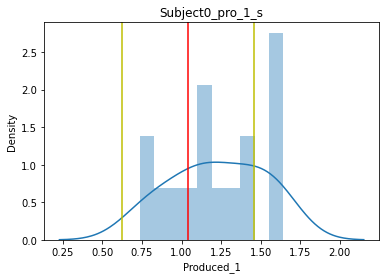

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


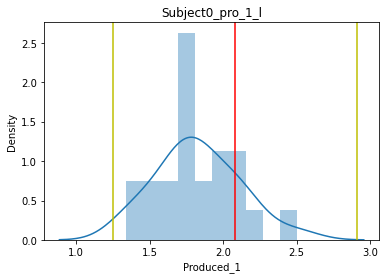

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


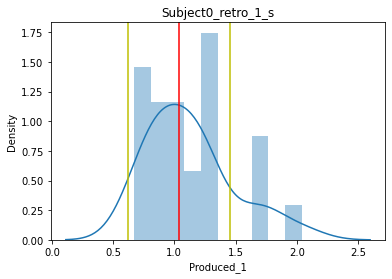

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


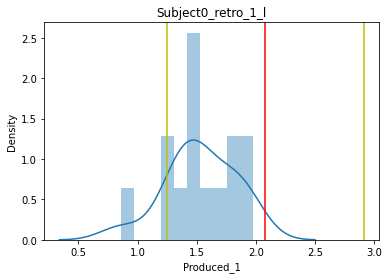

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


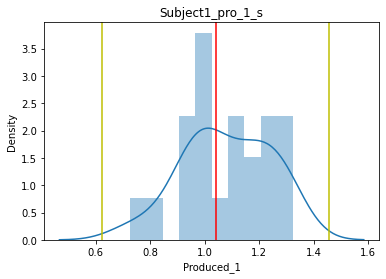

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


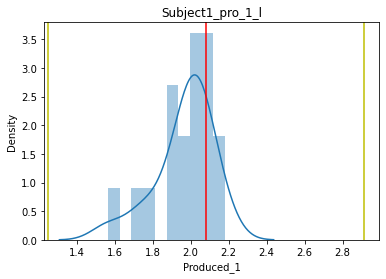

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


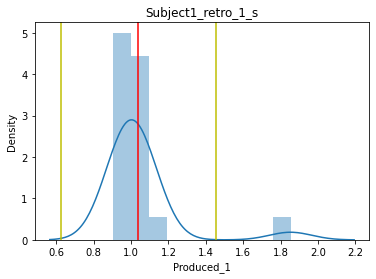

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


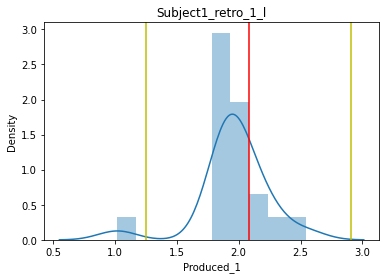

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


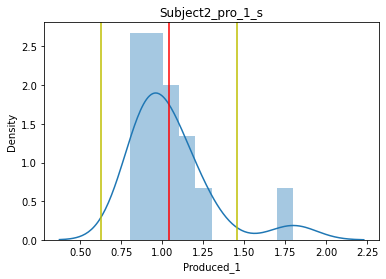

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


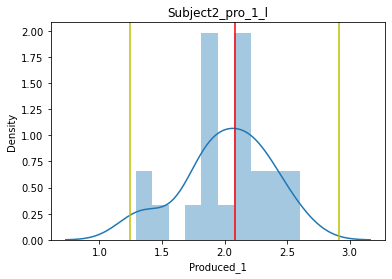

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


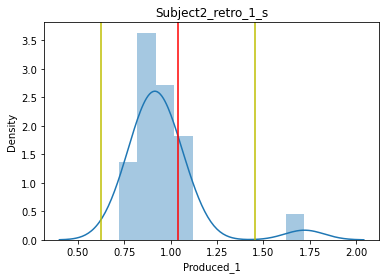

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


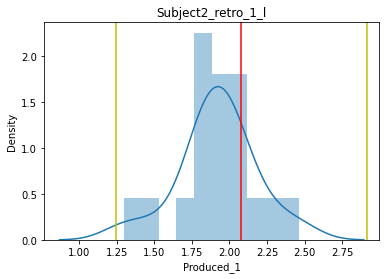

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


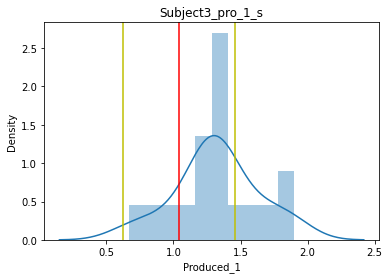

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


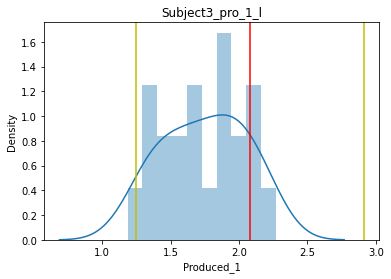

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


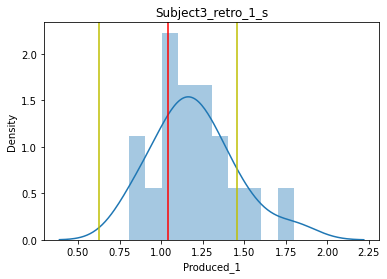

/home/ys270224/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


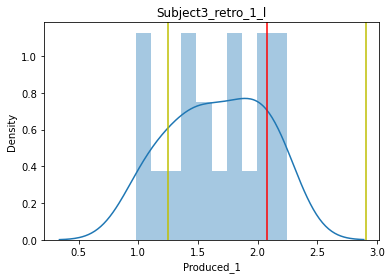

In [763]:
import seaborn as sns
for i in range(number_sub):    
    for key in keys:
        if '1' in key:
            data = Data_condition[i][key]['Produced_1']
            sns.distplot(data,bins= 10,hist=True)
            plt.axvline(x=Data_condition[i][key]['sequence_1'][0], color='r', linestyle='-')
            plt.axvline(x=Data_condition[i][key]['sequence_1'][0]*1.4, color='y', linestyle='-')
            plt.axvline(x=Data_condition[i][key]['sequence_1'][0]*0.6, color='y', linestyle='-')
            plt.title('Subject'+ str(i)+'_'+key)
            plt.show()  

In [767]:
keys = Data_condition[1].keys()
length = []
for i in range(number_sub):
    for key in keys:
        length.append(len(Data_condition[i][key]))
# length

In [768]:
Data_condition[1]['retro_2_s']

,index,trial,sequence_1,sequence_2,retention,attention,cue,n_items,trialstart,realtonestart_1,...,Produced_id_1,Produced_id_2,Produced_id_3,Produced_1,Produced_2,Error_1,Error_2,got_clicks,feedback,trailstop
0,5,6,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.107184,NaN,-0.972816,2,1.661521e+09,1.661521e+09
1,10,11,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,2.087808,NaN,0.007808,2,1.661521e+09,1.661521e+09
2,12,13,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,2.499942,NaN,0.419942,2,1.661521e+09,1.661521e+09
3,19,20,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.951728,NaN,-0.128272,2,1.661521e+09,1.661521e+09
4,21,22,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,2.148297,NaN,0.068297,2,1.661521e+09,1.661521e+09
5,24,25,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,0.958648,NaN,-1.121352,2,1.661521e+09,1.661521e+09
6,33,34,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.879593,NaN,-0.200407,2,1.661521e+09,1.661521e+09
7,40,41,1.04,2.08,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.990029,NaN,-0.089971,2,1.661521e+09,1.661521e+09
8,45,46,1.04,2.08,3.12,1,2,2,1.661523e+09,1.661523e+09,...,1.661523e+09,1.661523e+09,NaN,NaN,2.090654,NaN,0.010654,2,1.661523e+09,1.661523e+09
9,49,50,1.04,2.08,3.12,1,2,2,1.661524e+09,1.661524e+09,...,1.661524e+09,1.661524e+09,NaN,NaN,1.870876,NaN,-0.209124,2,1.661524e+09,1.661524e+09


In [769]:
for i in range(number_sub):
    check_len = 0
    for j in list(Data_condition[i].keys()):
        t = len(Data_condition[i][j])
        check_len += t
    print(check_len)

235
240
240
240


## Basic decription statics
### Check data 
### Produce mean, std, CV

In [770]:
# check outliner se>3
out_trial = {}
for i in range(number_sub):
    keys =  list(Data_condition[i].keys())
    out_trial[i] = {}
    for j in range(12):
        data =  Data_condition[i][keys[j]]
        if '0' in key:
            zscore_1 = stats.zscore(data['Produced_1'])
            zscore_2 = stats.zscore(data['Produced_2'])
            out_1 =(np.where(abs(zscore_1) > 3)[0]).tolist()
            out_2 =(np.where(abs(zscore_2) > 3)[0]).tolist()
        elif '1' in key:
            zscore_one = stats.zscore(data['Produced_1'])
            out_one =(np.where(abs(zscore_one) > 3)[0]).tolist()
        elif '2' in key:
            zscore_two = stats.zscore(data['Produced_2'])
            out_two =(np.where(abs(zscore_two) > 3)[0]).tolist()
        out = out_1+out_2+out_one+out_two
        if out:
            out_trial[i][keys[j]]=out

In [771]:
out_trial

{0: {'retro_0_s': [9]},
 1: {'pro_0_s': [11], 'retro_1_s': [17], 'retro_1_l': [15], 'retro_2_l': [6]},
 2: {'pro_1_s': [9], 'retro_1_s': [11], 'retro_0_s': [17], 'retro_0_l': [20]},
 3: {'pro_2_s': [13], 'pro_0_s': [19]}}

In [777]:
Data_condition[1]['retro_2_l']

,index,trial,sequence_1,sequence_2,retention,attention,cue,n_items,trialstart,realtonestart_1,...,Produced_id_1,Produced_id_2,Produced_id_3,Produced_1,Produced_2,Error_1,Error_2,got_clicks,feedback,trailstop
0,1,2,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.251619,NaN,0.211619,2,1.661521e+09,1.661521e+09
1,7,8,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.144580,NaN,0.104580,2,1.661521e+09,1.661521e+09
2,9,10,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.009590,NaN,-0.030410,2,1.661521e+09,1.661521e+09
3,22,23,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.058976,NaN,0.018976,2,1.661521e+09,1.661521e+09
4,28,29,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.005631,NaN,-0.034369,2,1.661521e+09,1.661521e+09
5,30,31,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.024308,NaN,-0.015692,2,1.661521e+09,1.661521e+09
6,32,33,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,1.864924,NaN,0.824924,2,1.661521e+09,1.661521e+09
7,34,35,2.08,1.04,3.12,1,2,2,1.661521e+09,1.661521e+09,...,1.661521e+09,1.661521e+09,NaN,NaN,0.991032,NaN,-0.048968,2,1.661521e+09,1.661521e+09
8,43,44,2.08,1.04,3.12,1,2,2,1.661523e+09,1.661523e+09,...,1.661523e+09,1.661523e+09,NaN,NaN,1.038296,NaN,-0.001704,2,1.661523e+09,1.661523e+09
9,50,51,2.08,1.04,3.12,1,2,2,1.661524e+09,1.661524e+09,...,1.661524e+09,1.661524e+09,NaN,NaN,0.915656,NaN,-0.124344,2,1.661524e+09,1.661524e+09


In [778]:
out_data = {}
for i in range(number_sub):
    out_data[i] = {}
    if out_trial[i]:
        for key in out_trial[i].keys():
                out_data[i][key] = Data_condition[i][key]
                for j in range(len(out_trial[i][key])):
                    ind = out_trial[i][key][j]
                    Data_condition[i][key]= out_data[i][key].drop(ind)

In [779]:
for i in range(number_sub):
    for key in keys:
        Data_condition[i][key] = Data_condition[i][key].reset_index(drop=True)

In [780]:
#  Produce mean,std,cv
def CV(data):
    mean = np.mean(data)
    std = np.std(data, ddof =0)
    cv= std/mean
    return mean,cv

Data_descrip={}
for key in keys:
    if '0' in key:
        Data_descrip[key] = pd.DataFrame(index=range(number_sub),columns=['Mean_1','Mean_2','Std_1','Std_2','BIAS_1','BIAS_2','VAR_1','VAR_2','CV_1','CV_2','RMSE_1','RMSE_2'])
    else:
        Data_descrip[key] = pd.DataFrame(index=range(number_sub),columns=['Mean','Std','BIAS','VAR','CV','RMSE'])

In [781]:
Data_descrip['pro_0_s']

,Mean_1,Mean_2,Std_1,Std_2,BIAS_1,BIAS_2,VAR_1,VAR_2,CV_1,CV_2,RMSE_1,RMSE_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [782]:
CV(Data_condition[1]['pro_1_s']['Produced_1'])

(1.079475012692538, 0.14485822189256276)

In [783]:
# Computer data
for i in range(number_sub):
    for key in keys:
        if '0' in key:
            Data_descrip[key]['BIAS_1'][i:i+1] = np.mean(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['Std_1'][i:i+1] = np.std(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['VAR_1'][i:i+1] = np.var(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['RMSE_1'][i:i+1] = np.sqrt(mean_squared_error(Data_condition[i][key]['sequence_1'], Data_condition[i][key]['Produced_1']))
            mean1,c1 = CV(Data_condition[i][key]['Produced_1'])
            Data_descrip[key]['Mean_1'][i:i+1] = mean1
            Data_descrip[key]['CV_1'][i:i+1] = c1
            
            Data_descrip[key]['BIAS_2'][i:i+1] = np.mean(np.absData_condition[i][key]['Error_2'])
            Data_descrip[key]['Std_2'][i:i+1] = np.std(Data_condition[i][key]['Error_2'])
            Data_descrip[key]['VAR_2'][i:i+1] = np.var(Data_condition[i][key]['Error_2'])
            Data_descrip[key]['RMSE_2'][i:i+1] = np.sqrt(mean_squared_error(Data_condition[i][key]['sequence_2'], Data_condition[i][key]['Produced_2']))
            mean2,c2 = CV(Data_condition[i][key]['Produced_2'])
            Data_descrip[key]['Mean_2'][i:i+1] = mean2
            Data_descrip[key]['CV_2'][i:i+1] = c2
 
        elif '1' in key:
            Data_descrip[key]['BIAS'][i:i+1] = np.mean(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['Std'][i:i+1] = np.std(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['VAR'][i:i+1] = np.var(Data_condition[i][key]['Error_1'])
            Data_descrip[key]['RMSE'][i:i+1] = np.sqrt(mean_squared_error(Data_condition[i][key]['sequence_1'], Data_condition[i][key]['Produced_1']))
            mean3,c3 = CV(Data_condition[i][key]['Produced_1'])
            Data_descrip[key]['Mean'][i:i+1] = mean3
            Data_descrip[key]['CV'][i:i+1] = c3
            
        elif '2' in key:
            Data_descrip[key]['BIAS'][i:i+1] = np.mean(Data_condition[i][key]['Error_2'])
            Data_descrip[key]['Std'][i:i+1] = np.std(Data_condition[i][key]['Error_2'])
            Data_descrip[key]['VAR'][i:i+1] = np.var(Data_condition[i][key]['Error_2'])
            Data_descrip[key]['RMSE'][i:i+1] = np.sqrt(mean_squared_error(Data_condition[i][key]['sequence_2'], Data_condition[i][key]['Produced_2']))
            mean4,c4 = CV(Data_condition[i][key]['Produced_2'])
            Data_descrip[key]['Mean'][i:i+1] = mean4
            Data_descrip[key]['CV'][i:i+1] = c4
         

In [784]:
Data_descrip['retro_0_l'] 

,Mean_1,Mean_2,Std_1,Std_2,BIAS_1,BIAS_2,VAR_1,VAR_2,CV_1,CV_2,RMSE_1,RMSE_2
0,1.399653,0.967039,0.303238,0.151564,-0.680347,-0.072961,0.091953,0.022972,0.216652,0.15673,0.744866,0.168211
1,1.940397,0.979295,0.098748,0.072431,-0.139603,-0.060705,0.009751,0.005246,0.050891,0.073962,0.170998,0.094505
2,1.830508,0.862192,0.24413,0.07336,-0.249492,-0.177808,0.059599,0.005382,0.133367,0.085086,0.349064,0.192348
3,1.617842,0.976906,0.227928,0.339463,-0.462158,-0.063094,0.051951,0.115235,0.140884,0.347488,0.515307,0.345276


In [785]:
def plot_origin(x_1,y_1,x_2,y_2,x_3,y_3,name):
    fig = plt.figure(1,figsize=[5,5])
    plt.xlim((0, 2.5))
    plt.ylim((0, 2.5))
    plt.scatter(x_1,y_1,color='g')
    plt.scatter(x_2,y_2,color='r')
    y_4 = np.arange(0,2.5,0.2)
    x_4 = y_4
    plt.plot(x_4,y_4,color='y',linestyle='dashed')
    plt.plot(x_3,y_3)
    plt.xlabel('Target duration')
    plt.ylabel('Produced duration')
    plt.title(name)
    plt.show()

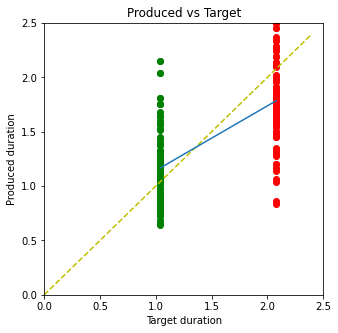

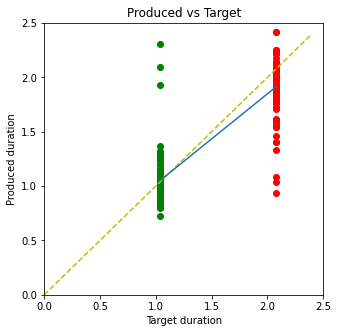

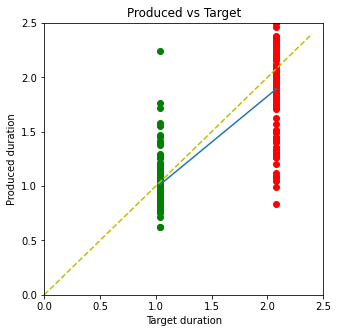

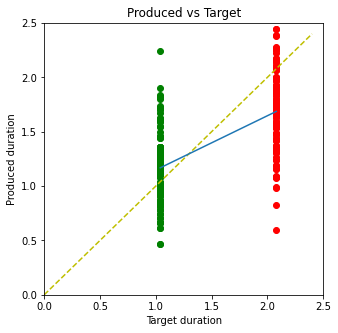

In [786]:
for i in range(number_sub):
    x_s = pd.concat([Data_condition[i]['pro_1_s']['sequence_1'],Data_condition[i]['retro_1_s']['sequence_1'],Data_condition[i]['pro_0_s']['sequence_1'],
                     Data_condition[i]['pro_0_l']['sequence_2'],Data_condition[i]['retro_0_s']['sequence_1'],Data_condition[i]['pro_0_l']['sequence_2']])
    y_s = pd.concat([Data_condition[i]['pro_1_s']['Produced_1'],Data_condition[i]['retro_1_s']['Produced_1'],Data_condition[i]['pro_0_s']['Produced_1'],
                     Data_condition[i]['pro_0_l']['Produced_2'],Data_condition[i]['retro_0_s']['Produced_1'],Data_condition[i]['pro_0_l']['Produced_2']])
    x_l = pd.concat([Data_condition[i]['pro_1_l']['sequence_1'],Data_condition[i]['retro_1_l']['sequence_1'],Data_condition[i]['pro_0_s']['sequence_2'],
                     Data_condition[i]['pro_0_l']['sequence_1'],Data_condition[i]['retro_0_s']['sequence_2'],Data_condition[i]['pro_0_l']['sequence_1']])
    y_l = pd.concat([Data_condition[i]['pro_1_l']['Produced_1'],Data_condition[i]['retro_1_l']['Produced_1'],Data_condition[i]['pro_0_s']['Produced_2'],
                     Data_condition[i]['pro_0_l']['Produced_1'],Data_condition[i]['retro_0_s']['Produced_2'],Data_condition[i]['pro_0_l']['Produced_1']])
    x_4 = [1.04,2.08]
    y_4 = [np.mean(y_s),np.mean(y_l)]
    name = 'Produced vs Target'
    plot_origin(x_s,y_s,x_l,y_l,x_4,y_4,name)

In [787]:
def plot_box_condition(y_1,y_2,Labels,xlabel,ylabel):
    fig = plt.figure(1,figsize=[5,5])
#     plt.ylim((0,0.4))
    box_1, box_2= y_1,y_2
    plt.boxplot([box_1, box_2],labels = Labels,patch_artist = True, boxprops = {'color':'orangered','facecolor':'green'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [788]:
def plot_scatter_conditon(y_1,y_2,xlabel1,xlabel2,xlabel3):
# scatter plot
    y_s = np.mean(y_1,axis=0)
    y_l = np.mean(y_2,axis=0)
    y = [y_s, y_l]
    x = xlabel1
    plt.scatter(x,y)
# mean plot
    m_s = np.mean(y_s)
    m_l = np.mean(y_l)
    m_y = xlabel2
    plt.plot(m_y,[m_s,m_l],color='y',linestyle='dashed')
# errorbar plot
    x_3 = xlabel3
    y_3 = [m_s,m_l]
    std_3 = np.std(y_s)/np.sqrt(number_sub),np.std(y_l)/np.sqrt(number_sub) 
    plt.errorbar(x_3,y_3,fmt="bo:",yerr=std_3)

    plt.xlabel('length')
    plt.ylabel('CV')
#     plt.xlim(0,2.5)
    plt.show()

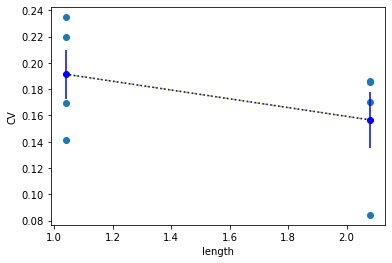

1.4647022119090598 0.2392295571150051


In [820]:
# Question1: whether consider the length of interval to caculate the ratio? only compare the short with long, average all condition
y_1 = []
y_2 = []
for key in keys:
    if '1_s' in key: 
        y_1.append(Data_descrip[key]['CV'])
    elif '0_s' in key:
        y_1.append(Data_descrip[key]['CV_1'])
    elif '1_l' in key:
        y_2.append(Data_descrip[key]['CV'])
    elif '0_l' in key:
        y_2.append(Data_descrip[key]['CV_1'])
# average across all condition
# plot_box_condition(y_s,y_l,[1.04,2.08],'Condition','CV')
plot_scatter_conditon(y_1,y_2,[[1.04,1.04,1.04,1.04],[2.08,2.08,2.08,2.08]],[1.04,2.08],[1.04,2.08])

y_s = np.mean(y_1,axis=0)
y_l = np.mean(y_2,axis=0)
    
t, pval = scipy.stats.ttest_rel(y_s,y_l,alternative='two-sided')
print(t,pval)

-3.8739769982817487 0.030446010368501128


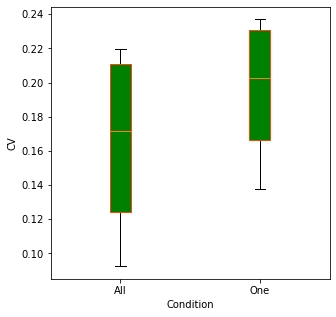

In [824]:
# Compare the reproduce one and reproduce all, averaeg all condition
y_11 = []
for key in keys:
    if '1' in key: 
        y_a.append(list(Data_descrip[key]['CV']))
    elif '0' in key:
        y_11.append(Data_descrip[key]['CV_1'])
        y_11.append(Data_descrip[key]['CV_2'])
y_A = np.mean(y_a,axis=0)
y_12 = np.mean(y_11,axis=0)
plot_box_condition(y_A,y_12,['All','One'],'Condition','CV')
t, pval = scipy.stats.ttest_rel(y_A,y_12,alternative='two-sided')
print(t,pval)

0.7924070414597021 0.4860030135789961


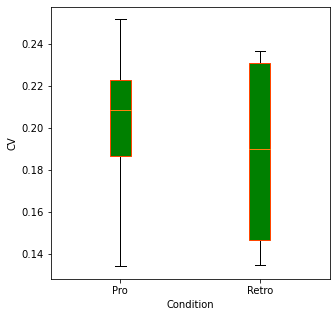

In [836]:
# Compare the pro one and retro,average all condition
y_pro = []
y_retro = []
for key in keys:
    if ('pro_1' in key)|('pro_2' in key): 
        y_pro.append(Data_descrip[key]['CV'])
    elif 'pro_0' in key:
        y_pro.append(Data_descrip[key]['CV_1'])
        y_pro.append(Data_descrip[key]['CV_2'])
    elif ('retro_1' in key)|('retro_2' in key):
        y_retro.append(Data_descrip[key]['CV'])
    elif 'retro_0' in key:
        y_retro.append(Data_descrip[key]['CV_1'])
        y_retro.append(Data_descrip[key]['CV_2'])
    
y_Pro = np.mean(y_pro,axis=0)
y_Retro = np.mean(y_retro,axis=0)
plot_box_condition(y_Pro,y_Retro,['Pro','Retro'],'Condition','CV')
t, pval = scipy.stats.ttest_rel(y_Pro,y_Retro,alternative='two-sided')
print(t,pval)

1.6035583688567276 0.2071447798436288


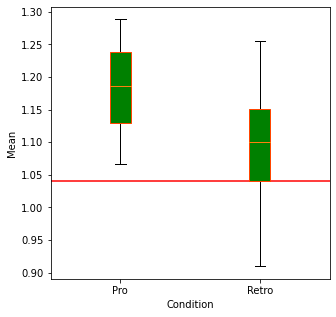

In [843]:
# Compare the pro one and retro with short length,average all condition
y_pro = []
y_retro = []
for key in keys:
    if 'pro_1_s' in key: 
        y_pro.append(Data_descrip[key]['Mean'])
    elif 'pro_0_s' in key:
        y_pro.append(Data_descrip[key]['Mean_1'])
    elif 'retro_1_s' in key:
        y_retro.append(Data_descrip[key]['Mean'])
    elif 'retro_0_s' in key:
        y_retro.append(Data_descrip[key]['Mean_1'])
    
y_Pro = np.mean(y_pro,axis=0)
y_Retro = np.mean(y_retro,axis=0)
plot_box_condition(y_Pro,y_Retro,['Pro','Retro'],'Condition','Mean')
plt.axhline(y=1.04, color='r', linestyle='-')
t, pval = scipy.stats.ttest_rel(y_Pro,y_Retro,alternative='two-sided')
print(t,pval)